<a href="https://colab.research.google.com/github/AndreaBertoglio/MLDM/blob/master/Presentazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import**

In [ ]:
import pip
import sys
import random
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
print("Random number with seed 2020")
# first call
random.seed(2020)

Random number with seed 2020


# **Pre-processing**


Per migliorare le prestazioni dei modelli utilizzati per l'apprendimento, è stato necessario effettuare una fase di pre-processing dei dati. In particolare, ci siamo occupati per la maggior parte di normalizzazione dei dati, gestione di dati mancanti, ricerca di eventuali outliers che interferissero con gli algoritmi di apprendimento, ed in misura minore di feature construction.

Link al notebook: https://github.com/AndreaBertoglio/MLDM/blob/master/Pre-processing/Data_Preprocessing.ipynb

## Analisi e normalizzazione

In prima battuta abbiamo fatto una rapida analisi dei dati, notando fin da subito che alcune feature del dataset presentavano distribuzioni di dati anomale, ad esempio se consideriamo la feature "density", si possono notare valori compresi tra valori vicini a 1 e valori vicini a 1000, mentre si nota una completa assenza di dati nei valori intermedi. Questo è stato probabilmente causato dall'utilizzo di unità di misura diverse per record diversi (verosimilmente mg/l e g/l nel caso di esempio). Un discorso simile vale anche per la "volatile acidity", anch'essa presenta valori disomogenei probabilmente dovuti a diverse unità di misura. Di conseguenza, per prima cosa sono state uniformate le unità di misura di ogni singola feature.

Come secondo fatto, si è notato che le varie feature tra loro, avevano valori molto diversi dato che misurando grandezze differenti si usano misure differenti (ad esempio per densità e pH), e quindi difficili da confrontare. Quindi è stato necessario normalizzare i dati per consentirne una migliore valutazione. Per la normalizzazione si sono visti due approcci distinti, uno che prevede la riscalatura dei valori su un range compreso tra 0 e 1, e un secondo che riscala i dati su una distribuzione normale con media 0 e varianza 1. I risultati migliori sono stati ottenuti con il secondo approccio, quindi d'ora in avanti si considererà solo quello.

Anche solo con questi due accorgimenti in fase di pre-processing le prestazioni dei modelli addestrati sono migliorate sensibilmente.




## Gestione valori fuori scala

Inoltre, dall'analisi dei dati è risultato che anche dopo la normalizzazione alcuni valori risultavano "fuori scala", ovvero risultavano molto distanti dalla maggior parte degli altri valori. Per ovviare al problema è stato deciso di rimuovere quei valori che risultavano fuori scala e gestirli come missing values.
Il punto cruciale di questa gestione è stato stabilire la giusta soglia per cui considerare un valore fuori scala oppure no. Per far ciò abbiamo analizzato i valori su diverse soglie.

Grafico 1: tabelle valori fuori scala
![GRAFICO1](https://raw.githubusercontent.com/AndreaBertoglio/MLDM/master/Immagini%20Presentazione/Tabelle%20valori%20fuori%20scala.PNG)

Grafico 2: valori fuori scala totali
![GRAFICO2](https://raw.githubusercontent.com/AndreaBertoglio/MLDM/master/Immagini%20Presentazione/Grafico%20percentuale%20valori%20fuori%20scala%20totali.PNG)

Grafico 3: valori fuori scala
![GRAFICO3](https://raw.githubusercontent.com/AndreaBertoglio/MLDM/master/Immagini%20Presentazione/Grafico%20valori%20fuori%20scala%20per%20ogni%20feature.PNG)

Grafico 4: particolare del grafico 3
![GRAFICO4](https://raw.githubusercontent.com/AndreaBertoglio/MLDM/master/Immagini%20Presentazione/Grafico%20valori%20fuori%20scala%20per%20ogni%20feature%20zoom.PNG)

Da queste analisi abbiamo ritenuto opportuno non utilizzare soglie troppo basse, poiché in questo modo avremmo potuto modificare anche dati corretti, e notando che con soglie superiori a 3.5 il numero di valori fuori scala non diminuiva significativamente, abbiamo ritenuto opportuno creare 3 dataset differenti con soglia rispettivamente a 3, 3.5 e 4. I migliori risultati si sono ottenuti comunque con la soglia di 3.5
Come detto in precedenza i dati “fuori scala” sono stati cancellati e considerati missing values.


## Missing values

Per la gestione dei missing values è stato dapprima utilizzato una semplice strategia di gestione sostituendo ogni valore mancante con la media degli altri valori, ed in seguito altre strategie abbastanza semplici, come il valore più frequente. Tuttavia, tali strategie risultavano poco efficaci in quanto generavano dati non veritieri o non rilevanti, quindi siamo passati ad un approccio leggermente più complesso con un imputer iterativo, che modella ogni feature con missing values in funzione di altre feature. Il processo avviene in modo iterativo: ad ogni passo, una colonna delle feature è designata come output y e le altre colonne sono trattate come input X. Viene creato un regressore sulla base di (X, y) per le y conosciute. Poi, il regressore viene usato per predire i missing values di y. Questo viene fatto per ogni caratteristica in modo iterativo, e poi è ripetuto più volte per avere una maggiore accuratezza.

## Outliers detection

Successivamente abbiamo provato a evidenziare quei dati che risultavano particolarmente diversi degli altri della stessa classe, ad esempio un elemento di classe “good”, ma che era molto distante dagli altri elementi della stessa classe e più simile a quelli di classe “bad”.
Per fare ciò abbiamo implementato un algoritmo per il riconoscimento di questi elementi, gli outliers. Tale algoritmo è basato sulla distanza di ogni elemento dagli altri elementi della stessa classe, in particolare si calcola la media delle distanze di ogni elemento da tutti gli altri. La distanza utilizzata è stata la distanza euclidea, e per la decisione della soglia è stato fatto un ragionamento simile a quello per la gestione dei valori fuori scala.

Grafico 5: Tabella outliers detection
![GRAFICO5](https://raw.githubusercontent.com/AndreaBertoglio/MLDM/master/Immagini%20Presentazione/Tabella%20outliers.PNG)


Grafico 6: Outliers detection
![GRAFICO6](https://raw.githubusercontent.com/AndreaBertoglio/MLDM/master/Immagini%20Presentazione/Grafico%20outliers%20a%20confronto%201%25.png)

Nella valutazione per la scelta della soglia abbiamo anche considerato l’ordine di esecuzione delle varie fasi di pre-processing. Ovviamente per prima avviene la normalizzazione dei dati e la gestione dei missing values, ma l’identificazione di outliers e la gestione dei valori fuori scala può essere fatta in ordine qualsiasi.
Dai risultati ottenuti si può notare come la gestione di valori fuori scala riduca notevolmente gli outliers identificati, di conseguenza abbiamo deciso di effettuare prima la gestione dei fuori scala e successivamente quella degli outliers.
Per la decisione sulla soglia si nota come con soglie inferiori a 20 tutti i dati sono considerati outliers, mentre la riduzione più consistente si ha fino a un valore di 50. Quindi, non volendo eliminare una parte troppo consistente del dataset, abbiamo deciso di eliminare fino ad un massimo dell'1% dei dati e anche in questo caso abbiamo creato diversi dataset con soglie di 40, 50 e 60.
Una volta identificati gli elementi outliers, la loro nostra decisione è stata semplicemente quella di non considerare tali elementi nei nostri algoritmi di apprendimento e quindi di eliminarli dal dataset.
Alla luce di ciò le prestazioni migliori sono state ottenute con la soglia pari a 40, ovvero considerando outliers tutti gli elementi con distanza media dagli altri superiore a 40.
Con queste operazioni aggiuntive le prestazioni dei modelli hanno subito un leggero miglioramento, ovviamente meno significativo per i modelli che per loro natura sono meno sensibili agli outliers (ad esempio alberi di decisione e random forest), e più marcati in modelli più sensibili come le Support Vector Machine.


## Feature creation

### Clustering

Infine, abbiamo provato un approccio di feature creation, in particolare utilizzando un semplice algoritmo di clustering e utilizzando la suddivisione in cluster come feature aggiuntiva. L’algoritmo scelto è stato il K-means, con 10 cluster.
Tuttavia, non abbiamo riscontrato significativi miglioramenti, ad eccezzione che in alberi di decisione e random forest, motivo per cui non è stato approfondito su altri metodi.

#### Link al notebook

LINK AL NOTEBOOK USATO PER LA FEATURE CONSTRUCTION

https://github.com/AndreaBertoglio/MLDM/blob/master/Pre-processing/ClusterASFeature.ipynb

### Feature construction

In alternativa abbiamo tentato un approccio di feature construction basato sull’analisi delle feature disponibili, notando come “fixed acidity” sia fortemente correlata con “citric acid” e “density”. Di conseguenza abbiamo pensato di utilizzare due nuove feature che fossero combinazione delle precedenti:

“citric acidity” = “fixed acidity” * “citric acid”

“density acidity” = “fixed acidity” * “density”

Anche questo approccio però si è rivelato poco efficace e quindi non è stato approffondito e utilizzato.

#### Codice

In [ ]:
def featureConstruction(dataset):
  
  citricacid = dataset['fixed.acidity'] * dataset['citric.acid']
  citric_acidity = pd.DataFrame(citricacid, columns=['citric_accidity'])

  density_acidity = dataset['fixed.acidity'] * dataset['density']
  density_acidity = pd.DataFrame(density_acidity, columns=['density_acidity'])

  datafinal = dataset.join(citric_acidity).join(density_acidity)

  return datafinal

# **Caricamento dataset**

In [ ]:
trainFilePath='https://raw.githubusercontent.com/AndreaBertoglio/MLDM/master/Pre-processing/Data%20Set%20elaborati/SetSoloOutlierPerFeature_soglia3%2C5.csv'
train = pd.read_csv(trainFilePath)

#train["Quality"] = np.where(train["Quality"].str.contains("Good"), 1, 0)
train["Quality"] = np.where(train["Quality"].astype(str).str.contains("1.0"), 1, 0)

In [ ]:
testFilePath='https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/Kaggle2020/test.csv'
test = pd.read_csv(testFilePath)

## Divisione dataset

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

train_y = train.Quality

predictor_cols = ['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol']

train_x = train[predictor_cols]

#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = IterativeImputer(missing_values=np.nan, max_iter=100, initial_strategy='mean')
imp = imp.fit(train_x)

# Impute our data, then train
train_X_imp = imp.transform(train_x)

from sklearn.model_selection import train_test_split
#Uso l'80% dei dati per train e il restante 20% per test
xTrain, xTest, yTrain, yTest = train_test_split(train_X_imp, train_y, train_size = 0.8, random_state = 0)

# **Grid search e K-fold cross validation**


Nel machine learning,l'**ottimizzazione degli iperparametri** è il problema di scegliere un insieme di iperparametri ottimali per un algoritmo di apprendimento. Un iperparametro è un parametro il cui valore viene utilizzato per controllare il processo di apprendimento. \\
Lo stesso modello di machine learning può richiedere vincoli, pesi o velocità di apprendimento diversi per generalizzare modelli di dati diversi. Queste misure sono chiamate iperparametri e devono essere regolate in modo che il modello possa risolvere in modo ottimale il problema dell'apprendimento automatico. L'ottimizzazione degli iperparametri trova una tupla di iperparametri che produce un modello ottimale che riduce al minimo una funzione di perdita predefinita sui dati indipendenti. La funzione obiettivo accetta una tupla di iperparametri e restituisce la "loss" associata. La *cross-validation* viene spesso utilizzata per stimare questa prestazione di generalizzazione.


Il modo tradizionale di eseguire l'ottimizzazione degli iperparametri è la **Grid search**, o sweep di parametri, che è semplicemente una ricerca esaustiva attraverso un sottoinsieme specificato manualmente dello spazio iperparametrico di un algoritmo di apprendimento. Un algoritmo di ricerca sulla griglia deve essere guidato da una metrica sulle prestazioni, in genere misurata mediante cross validation sul training set o valutazione su un validation set.

In [ ]:
# Pseudocodice standard Grid
from sklearn.model_selection import GridSearchCV
# parameters = {'iperparametro1':['lista valori da testare,...'],
#             'iperparametro2':['lista valori da testare,...'],
#              ...
#              }
#model = CreazioneModello()

#grid = GridSearchCV(model, parameters)
#grid.fit(xTrain, yTrain)

La **Cross validation** è una tecnica di convalida di modelli simili per valutare come i risultati di un'analisi si generalizzerà su un set di dati indipendente. Viene utilizzato principalmente in ambienti in cui l'obiettivo è la previsione e si desidera stimare la precisione con cui un modello predittivo lavorerà nella pratica. In un problema di previsione, a un modello viene solitamente assegnato un set di dati noti su cui viene eseguito il training (training set) e un set di dati sconosciuti (visualizzati per la prima volta) rispetto al quale viene testato il modello (chiamato validation set). L'obiettivo della cross validation è quello di testare la capacità del modello di prevedere nuovi dati che non sono stati utilizzati per la stima, al fine di evitare problemi come l'overfitting o il bias di selezione e per dare un'idea di come il modello si generalizzerà a un dataset indipendente (cioè, un dataset sconosciuto, ad esempio da un problema reale).\\
Un ciclo di cross validation prevede il partizionamento di un campione di dati in sottoinsiemi complementari, l'esecuzione dell'analisi su un sottoinsieme e la convalida dell'analisi sull'altro sottoinsieme. Per ridurre la variabilità, nella maggior parte dei metodi vengono eseguiti più cicli di cross validation utilizzando partizioni diverse e i risultati della convalida vengono combinati (ad esempio, tramite una media) nei cicli per fornire una stima delle prestazioni predittive del modello.

In sintesi, la cross validation combina  misure di fitness nella previsione per ottenere una stima più accurata delle prestazioni di previsione del modello. 

Nella **K-fold cross validation**, il campione originale viene suddiviso in modo casuale in k sottocampioni di uguale dimensione. Dei k sottocampioni, un singolo sottocampione viene conservato come validation set per testare il modello e i restanti k-1 sottocampioni vengono utilizzati come training set. Il processo di cross validation viene quindi ripetuto k volte, con ciascuno dei k sottocampioni utilizzato esattamente una volta come validation set. I k risultati possono quindi essere mediati per produrre una singola stima. Il vantaggio di questo metodo è che tutte le osservazioni vengono utilizzate sia per il train che per la validation e ogni osservazione viene utilizzata per la convalida esattamente una volta. La 10-fold cross validation è la più utilizzata, ma in generale k rimane un parametro variabile.

In [ ]:
# Codice standard k-fold
from sklearn.model_selection import StratifiedKFold

cross_validation = StratifiedKFold(n_splits=10)
cross_validation.get_n_splits(xTrain, yTrain)

10

Come accennato in precedenta la K-fold cross validation viene spesso utilizzata insieme alla Grid Search, in modo da ottenere il modello con le prestazioni migliori tra tutte le possibili combinazioni di iperparametri impostati manualmente.

In [ ]:
# Pseudocodice Grid search + k-fold
# grid_search= GridSearchCV(modello, param_grid=parameter_grid, cv=cross_validation, scoring=SCORING,return_train_score=True, refit='f1')

Notiamo come sia possibile settare altri parametri per ottimizzare il lavoro della grid search, ad esempio utilizzando come metrica di classificazione la f1 measure.

# **Metodi**



## *Decision Tree Classifier*


Gli alberi di decisione sono un metodo di classificazione di records, i quali contengono vari attributi, tra cui il più importante è la classe. Quest'ultimo è, infatti, quello che deve essere predetto dall'algoritmo, sulla base dei valori assunti dagli altri attributi. Nel nostro caso la classe è rappresentata da un valore binario: "Good" e "Bad".
Gli alberi di decisione sono formati da vari nodi, ognuno dei quali rappresenta un test su uno specifico attributo. Le alternative che si diramano dai nodi corrispondono ai possibili valori che l'attributo può assumere. Questa suddivisione può essere binaria, quindi diramazione in due soli rami, oppure multy-way, quindi una suddivisione in k percorsi, con k>2. La scelta sullo specifico modo di splittare viene effettuata in base al tipo di attributi che formano i nostri records: una divisione binaria si presta bene per quelli attributi che assumono un valore booleano, un valore binario oppure un valore numerico, scegliendo, in quest'ultimo caso, un valore preciso in cui suddividere i due insiemi. La suddivisione multi-way è adatta nei casi in cui un valore può assumere tanti valori differenti, creando così una ramificazione per ogni possibile valore assunto dall'attributo.
L'altezza massima che può assumere l'albero è pari al numero di attributi differenti contenuti nei record, effettuando, in tal modo, un controllo per ogni singolo attributo. I nodi foglia rappresentano la classe, cioè il valore obiettivo che vogliamo predire. 

La scelta della suddivisione dei nodi è basata su alcune misure di similarità: Gini Index, Entropia oppure errore di classificazione. In queste l'obiettivo che si vuole ottenere è quello di avere la maggior omogeneità possibile, riducendo sempre più l'impurità. Questo viene ottenuto quando all'interno di un nodo la maggior parte delle istanze, se non tutte, appartengono alla stessa classe, evitando così situazioni in cui si ha alta eterogeneità di classi all'interno del medesimo nodo.

La classificazione di una nuova istanza avviene partendo dal nodo radice, il primo realizzato, man mano scendendo seguendo il percorso designato in base ai valori dei vari attributi del record che stiamo considerando. Pertanto sia la classificazione dei records che la spiegazione della stessa risultano molto semplici e intuitive, formate, per l'appunto, da una sequenza di confronti all'interno dei nodi, che portano l'istanza ad arrivare ad un determinato nodo foglia contrassegnato con una specifica classe.

In [ ]:
# Codice standard

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

Abbiamo usato i Decision Trees principalmente all'interno del contesto della Grid Search, modificando i parametri maggiormente significativi e quelli che ci portavano ad ottenere i risultati migliori:

*   **Criterion:** Indica la funzione che vione usata per misurare la qualità dello split. I criteri possibili sono "Gini" ed "Entropy". Provando ad usarli entrambi abbiamo notato che ottenevamo un public score migliore sfruttando il "Gini".
*   **Splitter:** Rappresenta la strategia usata per decidere lo split da effettuare ad ogni nodo. Le possibilità sono "best" e "random". Nel nostro progetto abbaimo sfruttato praticamente sempre best, scegliendo così sempre lo split che portava i migliori risultati in base al criterio scelto.
*   **Max Depth:** Indica la profondità massima raggiungibile dall'albero. Questo serve ad impedire overfitting, fermando la creazione dell'albero prima dell'analisi completa di ogni attributo. Se non viene indicato nulla, la ricerca continua finchè le foglie non sono pure (cioè contengono solo elementi della stessa classe) o finchè tutte le foglie non contengono meno di "*Min samples split*" elementi. Effettuando varie prove abbiamo constatato che i risultati migliori si ottenevano con una profondità che si aggira tra i 5 e i 7 nodi.
*   **Min Samples Split:** Rappresenta il numero minimo di istanze richieste in un nodo per poterlo splittare: se il numero è un intero allora viene preso quel numero come il minimo, se invece è un reale *Min samples split* assume un valore pari allp'intero superiore del prodotto di tale reale per il numero totale di istanze. Nelle nostra prove abbiamo notato che spesso il valore di default di 2 assegnato a questo parametro è troppo basso e porta ad overfitting. Quindi abbiamo alzato questo limite portandolo ad un valore tra 10 e 30, ottenendo migliori risultati.
*   **Min Samples Leaf:** Indica il numero minimo numero di istanze che servono per poter essere considerato un nodo foglia. Uno split può essere effettuato solo se tutti i nodi in cui il nodo padre viene diviso contengono almeno "*Min samples leaf* istanze. Come prima serve principalmente ad evitare che si crei overfitting, pertanto lo abbiamo usato in alternativa a "*Min samples split*", ottenendo risultati migliori agendo su quest'ultimo.
*   **Max Features:** Il numero di attributi da considerare quando cerco il best split. Noi abbiamo utilizzato spesso un numero reale per questo parametro, per indicare la frazione di attributi da considerare, ottenendo i migliori risultati con un valore compreso tra 0.5 e 0.7.

Abbiamo provato a modificare la percentuale di istanze assegnate al training set e quelle assegnate al testset, ricavando le risposte migliori da parte del classificatore quando assegnavamo al training set una percentuale intorno al 70/80%. 

Inoltre abbiamo sfruttato due diversi tipi di Imputer, "Simple" e "Iterative", notando subito miglioramenti dal punto di vista dello score sfruttando quest'ultimo. Il "Simple Imputer" stima i valori di una feature considerando solo i non-missing value legati a quella feature, mentre l'"Iterative Imputer" stima ogni feature usando tutte le altre, modellando ogni attributo contenente missing values come una funzione degli altri attributi in una schedulazione round-robin.

Il risultato migliore l'abbiamo ottenuto sfruttando il 75% del dataset per il train e il restante 25% per il test.


In [ ]:
# Best risultato

#User defined decision tree evaluated with Grid Search 

parameter_grid = {
    'criterion':['gini','entropy'], 
    'splitter': ['best'], 
    'max_depth': [5,7], 
    'min_samples_split':[10,20,30,0.1], 
    'max_features':[0.2,0.4,0.7] 
    }

cross_validation = StratifiedKFold(n_splits=10)
cross_validation.get_n_splits(train_X_imp, train_y)
#Create the scoring dictionary
SCORING = {'accuracy': 'accuracy',
'balanced_accuracy': 'balanced_accuracy',
'precision': 'precision_macro',
'recall': 'recall_macro',
'f1': 'f1_macro'}

grid_search = GridSearchCV(dtc, param_grid=parameter_grid, cv=cross_validation, scoring=SCORING,return_train_score=True, refit='f1')

grid_search.fit(xTrain, yTrain)



GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              pres...
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'max_features': [0.2, 0.4, 0.7],
                         'min_samples_split': [10, 20

In [ ]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_dtc = grid_search.best_estimator_
my_model=best_dtc
my_model.fit(xTrain, yTrain)
my_model.score(xTest, yTest)

Best score: 0.7303925345308111
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.7, 'min_samples_split': 20, 'splitter': 'best'}


0.7521489971346705

Public Score: **0.74785**

Private Score: **0.76319**

Il Decision Tree Classifier si è rivelato un metodo abbastanza facile da usare e da capire, riuscendo ad individuare subito i parametri che impattavano di più sulla soluzione. I risultati ottenuti, però, non sono ottimi, infatti sono di molto inferiori a quelli dei metodi d'insieme, ma tra i metodi non d'insieme risulta uno dei migliori.

## *Linear Regression*


La *Linear regression* è un semplice approccio al "supervised learning", prevede che la dipendenza tra Y e X1,X2,…,Xp sia lineare. \\
Il metodo infatti approssima l'andamento dei dati con una retta, cercando di minimizzare l'errore.

In [ ]:
# Codice standard
from sklearn.linear_model import LinearRegression

lin_reg =LinearRegression()

Il problema della LinearRegression è che non può essere utilizzata per la classificazione binaria, per questo motivo abbiamo deciso di utilizzare il RidgeClassifier: questo classificatore prima converte i target values in {-1, 1} e poi tratta il problema con la regressione lineare. \\

Sfruttiamo la grid search per valutare l'algoritmo con vari tipi di **solver**: \\
* ‘auto’ chooses the solver automatically based on the type of data. \\
* svd’ uses a Singular Value Decomposition of X to compute the Ridge  coefficients. More stable for singular matrices than ‘cholesky’. \\
* ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution. \\
* ‘sparse_cg’ uses the conjugate gradient solver as found in scipy.sparse.linalg.cg. As an iterative algorithm, this solver is more appropriate than ‘cholesky’ for large-scale data (possibility to set tol and max_iter). \\
* ‘lsqr’ uses the dedicated regularized least-squares routine scipy.sparse.linalg.lsqr. It is the fastest and uses an iterative procedure.

In [ ]:
# Best risultato
from sklearn.linear_model import RidgeClassifier

lin_reg =RidgeClassifier()
parameter_grid={'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']}
cross_validation = StratifiedKFold(n_splits=10)
cross_validation.get_n_splits(xTrain, yTrain)
SCORING = {'accuracy': 'accuracy',
'balanced_accuracy': 'balanced_accuracy',
'precision': 'precision_macro',
'recall': 'recall_macro',
'f1': 'f1_macro'}
grid_search= GridSearchCV(lin_reg, param_grid=parameter_grid, cv=cross_validation, scoring=SCORING,return_train_score=True, refit='f1')
grid_search.fit(xTrain, yTrain)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg']},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro', 'precision': 'precision_macro',
                      'recall': 'recall_macro'},
             verbose=0)

In [ ]:
# Score locale
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_dtc = grid_search.best_estimator_
my_model=best_dtc
my_model.fit(xTrain, yTrain)
my_model.score(xTest, yTest)

Best score: 0.7068422566464572
Best parameters: {'solver': 'auto'}


0.7449856733524355

**Public score**: 0.73065 \\
**Private score**: 0.74846 \\
Questo metodo ha conseguito risultati scadenti in quanto non si adatta nel miglior modo al nostro problema, limitando la classificazione a un modello lineare.

## *Logistic Regression*


In statistica e in econometria la *Logistic regression* è un modello di regressione nonlineare utilizzato quando la variabile dipendente è di tipo dicotomico. \\
 L'obiettivo del modello è di stabilire la probabilità con cui un'osservazione può generare uno o l'altro valore della variabile dipendente; può inoltre essere utilizzato per classificare le osservazioni, in base alla caratteristiche di queste, in due categorie

In [ ]:
# Codice standard
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

Abbiamo deciso di sfruttare questo metodo in quanto, rispetto alla *Linear regression* è più adatto a una classificazione binaria. \\
É stato possibile sfruttare una parameter grid abbastanza fitta in quanto il metodo ha il pregio di essere relativamente veloce, grazie a ciò è stato possibile testare varie combinazioni di parametri quali: \\

* 'penalty' per specificare la norma utilizzata nella penalizzazione,
* 'dual' per il tipo di formulazione (dual o primal),
* 'C' per il peso della regolarizzazione,
* 'solver' per il tipo di risolutore, 
* 'max_iter' per il numero massimo di iterazioni concesse (in modo da evitare l'overfitting).



In [ ]:
# Best risultato
log_reg = LogisticRegression()
parameter_grid = {'penalty': ['l1', 'l2'],
                  'dual':[True,False],
                  'tol': [1e-4,1e-2],
                  'C': [0.01,1,3,10,100],
                  'solver' : ['saga','lbfgs'],
                  'max_iter': [50,100,200]}

cross_validation = StratifiedKFold(n_splits=10)
cross_validation.get_n_splits(xTrain, yTrain)

SCORING = {'accuracy': 'accuracy',
'balanced_accuracy': 'balanced_accuracy',
'precision': 'precision_macro',
'recall': 'recall_macro',
'f1': 'f1_macro'}
grid_search= GridSearchCV(log_reg, param_grid=parameter_grid, cv=cross_validation, scoring=SCORING,return_train_score=True, refit='f1')
grid_search.fit(xTrain, yTrain)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver saga supports only dual=False, got dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only dual=False, got dual=True

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprec...
             param_grid={'C': [0.01, 1, 3, 10, 100], 'dual': [True, False],
                         'max_iter': [50, 100, 200], 'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'lbfgs'], 'tol': [0.0001, 0.01]},
             pre_dispatch='2*n_jobs', refit='f1', return_train

In [ ]:
# Score locale
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_dtc = grid_search.best_estimator_
my_model=best_dtc
my_model.fit(xTrain, yTrain)
my_model.score(xTest, yTest)

Best score: 0.7064348542087665
Best parameters: {'C': 100, 'dual': False, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7363896848137536

**Public score**: 0.72147 \\
**Private score**: 0.71633 \\
Anche questo metodo non è performante in quanto non si adatta nel modo migliore al problema, approssimandolo in modo poco accurato.

## *Neural network*


Le reti neurali artificiali (ANN), solitamente chiamate semplicemente reti neurali (NN), sono sistemi informatici vagamente ispirati alle reti neurali biologiche che costituiscono il cervello degli animali.
Una ANN si basa su una raccolta di unità o nodi collegati chiamati neuroni, che modellano vagamente i neuroni in un cervello biologico. Ogni connessione, come le sinapsi in un cervello, può trasmettere un segnale ad altri neuroni. Un neurone che riceve un segnale lo elabora e può inoltrarlo ai neuroni ad esso collegati. Il "segnale" in una connessione è un numero reale e l'uscita di ogni neurone è calcolata da una funzione non lineare dipendente della somma dei suoi ingressi. Neuroni e connessioni hanno tipicamente un peso che si adatta man mano che l'apprendimento procede. Il peso aumenta o diminuisce la potenza del segnale a una connessione. I neuroni possono avere una soglia tale che un segnale viene inviato solo se il segnale aggregato supera quella soglia. In genere, i neuroni vengono aggregati in strati. Livelli diversi possono eseguire trasformazioni diverse sui loro input. I segnali viaggiano dal primo livello (input layer), all'ultimo livello (output layer), possibilmente dopo aver attraversato più livelli intermedi (hidden layer).

### Keras

Keras è un'API per reti neurali di alto livello, scritta in Python e può essere eseguita su TensorFlow, CNTK o Theano. È stato sviluppato con l'obiettivo di consentire una rapida sperimentazione. I vantaggi dell'utilizzo di Keras derivano dal fatto che si concentra sull'essere user-friendly, modulare ed estensibile. \\
Sfruttandolo è possibile costruire reti neurali in modo semplice ed intuitivo, definendo il numero di neuroni da aggiungere per ogni livello, ognuno con una determinata funzione di attivazione.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(15,kernel_initializer='uniform', activation='relu', input_shape=(11,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='SGD',
              metrics=['accuracy',tf.keras.metrics.AUC()])
                   
training_phase =model.fit(xTrain, yTrain,epochs=25, batch_size=1,  validation_split=0.2, verbose=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/25
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2226/2232 [============================>.] - ETA: 0s - loss: 0.6464 - accuracy: 0.6604 - auc_1: 0.4871

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2232/2232 [==============================] - 4s 2ms/step - loss: 0.6464 - accuracy: 0.6604 - auc_1: 0.4871 - val_loss: 0.6532 - val_accuracy: 0.6404 - val_auc_1: 0.5000
Epoch 2/25
2232/2232 [==============================] - 3s 1ms/step - loss: 0.6407 - accuracy: 0.6622 - auc_1: 0.4680 - val_loss: 0.6545 - val_accuracy: 0.6404 - val_auc_1: 0.5000
Epoch 3/25
2232/2232 [==============================] - 3s 1ms/step - loss: 0.6404 - accuracy: 0.6622 - auc_1: 0.4877 - val_loss: 0.6545 - val_accuracy: 0.6404 - val_auc_1: 0.5000
Epoch 4/25
2232/2232 [==============================] - 3s 1ms/step - loss: 0.6402 - 

loss


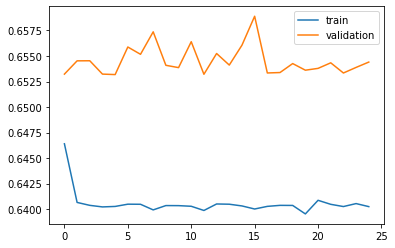

Accuracy


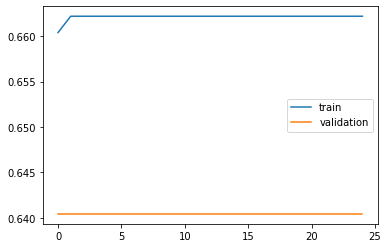

In [ ]:
    import matplotlib.pyplot as pyplot
    
    # plot training history
    print("loss")
    pyplot.plot(training_phase.history['loss'], label='train')
    pyplot.plot(training_phase.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()
    
    print("Accuracy")
    pyplot.plot(training_phase.history['accuracy'], label='train')
    pyplot.plot(training_phase.history['val_accuracy'], label='validation')
    pyplot.legend()
    pyplot.show()

**Public score**: 0.76564 \\
**Private score**: 0.79656 \\
Sfruttando solamente Keras è difficile capire come poter migliorare il modello, oltre che molto lento in quanto ogni volta è necessario modificare manualmente la composizione dei layer della rete neurale. \\
Per evitare questo problema e sfruttare a pieno le potenzialità delle reti neurali è possibile utilizzare la grid search per costruire dinamicamente più reti neurali differenti.

### Neural Network con Grid search

Tramite la grid search è possibile costruire più reti neurali di dimensioni differenti in modo da individuare il modello migliore per il dataset a disposizione, per farlo è stato necessario definire una funzione per la costruzione di un modello che richiede in input il numero di neuroni per ogni livello e il tipo di funzione di attivazione.

In [ ]:
def createModel(hidden_layers=0, input_neurons=8, hidden_neurons=8, activation_fun='relu', _optimizer='SGD'):
  # Initialize the constructor
  model = Sequential()

  # Add an input layer 
  model.add(Dense(input_neurons, activation=activation_fun, input_shape=(11,)))

  # Add hidden layers
  for i in range(hidden_layers): 
    model.add(Dense(hidden_neurons, activation=activation_fun))

  # Add an output layer 
  model.add(Dense(1, activation='sigmoid'))   
  
  #Compile model
  model.compile(loss='binary_crossentropy',
              optimizer=_optimizer,
              metrics=['accuracy',tf.keras.metrics.AUC()])

  return model

`model = KerasClassifier(build_fn=createModel(args), verbose=1)`



Grazie alla funzione definita è possibile sfruttare la grid search per chiamarla con parametri sempre differenti:
* epochs: numero di epoche per il train della rete
* batch_size: ogni quanto fare back propagation [maggiore o uguale a 1]
* input_neurons: quanti neuroni inserire nello strato di input [maggiore o uguale a 1]
* hidden_layers: numero di livelli nascosti (interni) [intero non negativo]
* hidden_neurons: quanti neuroni inserire negli strati interni [maggiore o uguale a 1]
* _optimizer: algoritmo di ottimizzazione usato ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
* activation_fun: funzione di attivazione dei neuroni ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
parameter_grid = {'epochs': [15],
                  'batch_size': [1],
                  'input_neurons': [24],
                  'hidden_neurons': [8],
                  'hidden_layers': [1],
                  '_optimizer': ['Nadam'],
                  'activation_fun': ['tanh']}



#Create the scoring dictionary
SCORING = {'f1': 'f1_macro',
          'accuracy': 'accuracy',
          'balanced_accuracy': 'balanced_accuracy',
          'precision': 'precision_macro',
          'recall': 'recall_macro'}

cross_validation = StratifiedKFold(n_splits=3)
cross_validation.get_n_splits(xTrain, yTrain)

model = KerasClassifier(build_fn=createModel, verbose=1)

#grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=cross_validation, )
grid_search = GridSearchCV(model, param_grid=parameter_grid, cv=cross_validation, scoring=SCORING, return_train_score=True, refit='accuracy')

grid_search.fit(xTrain, yTrain)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1860/1860 [==============================] - 2s 1ms/step - loss: 0.6404 - accuracy: 0.6500 - auc_2: 0.5603
Epoch 2/15
1860/1860 [==============================] - 2s 1ms/step - loss: 0.6239 - accuracy: 0.6694 - auc_2: 0.6155
Epoch 3/15
1860/1860 [==============================] - 2s 1ms/step - loss: 0.6195 - accuracy: 0.6699 - auc_2: 0.6244
Epoch 4/15
1860/1860 [==============================] - 2s 1ms/step - loss: 0.6091 - accuracy: 0.6672 - auc_2: 0.6527
Epoch 5/15
1860/1860 [==============================] - 2s 1ms/step - loss: 0.6001 - accuracy: 0.6742 - auc_2: 0.6762
Epoch 6/15
1860/1860 [==

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1860/1860 [==============================] - 1s 651us/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1861/1861 [==============================] - 3s 1ms/step - loss: 0.6452 - accuracy: 0.6491 - auc_3: 0.5582
Epoch 2/15
1861/1861 [==============================] - 2s 1ms/step - loss: 0.6214 - accuracy: 0.6588 - auc_3: 0.6214
Epoch 3/15
1861/1861 [==============================] - 2s 1ms/step - loss: 0.6116 - accuracy: 0.6550 - auc_3: 0.6409
Epoch 4/15
1861/1861 [==============================] - 2s 1ms/step - loss: 0.5964 - accuracy: 0.6625 - auc_3: 0.6793
Epoch 5/15
1861/1861 [==============================] - 2s 1ms/step - loss: 0.5868 - accuracy: 0.6658 - auc_3: 0.6939
Epoch 6/15
1861/1861 [==

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1861/1861 [==============================] - 2s 914us/step


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1861/1861 [==============================] - 3s 2ms/step - loss: 0.6057 - accuracy: 0.6647 - auc_4: 0.6575
Epoch 2/15
1861/1861 [==============================] - 3s 2ms/step - loss: 0.5906 - accuracy: 0.6615 - auc_4: 0.6901
Epoch 3/15
1861/1861 [==============================] - 2s 1ms/step - loss: 0.5882 - accuracy: 0.6728 - auc_4: 0.6959
Epoch 4/15
1861/1861 [==============================] - 2s 1ms/step - loss: 0.5893 - accuracy: 0.6582 - auc_4: 0.6906
Epoch 5/15
1861/1861 [==============================] - 2s 1ms/step - loss: 0.5811 - accuracy: 0.6717 - auc_4: 0.7027
Epoch 6/15
1861/1861 [==

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1861/1861 [==============================] - 1s 644us/step
Epoch 1/15


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2791/2791 [==============================] - 3s 1ms/step - loss: 0.6333 - accuracy: 0.6578 - auc_5: 0.5804
Epoch 2/15
2791/2791 [==============================] - 4s 1ms/step - loss: 0.6132 - accuracy: 0.6525 - auc_5: 0.6433
Epoch 3/15
2791/2791 [==============================] - 4s 1ms/step - loss: 0.6126 - accuracy: 0.6718 - auc_5: 0.6413
Epoch 4/15
2791/2791 [==============================] - 4s 1ms/step - loss: 0.5942 - accuracy: 0.6682 - auc_5: 0.6847
Epoch 5/15
2791/2791 [==============================] - 3s 1ms/step - loss: 0.5833 - accuracy: 0.6804 - auc_5: 0.7007
Epoch 6/15
2791/2791 [=============

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9975fc8668>,
             iid='deprecated', n_jobs=None,
             param_grid={'_optimizer': ['Nadam'], 'activation_fun': ['tanh'],
                         'batch_size': [1], 'epochs': [15],
                         'hidden_layers': [1], 'hidden_neurons': [8],
                         'input_neurons': [24]},
             pre_dispatch='2*n_jobs', refit='accuracy', return_train_score=True,
             scoring={'accuracy': 'accuracy',
                      'balanced_accuracy': 'balanced_accuracy',
                      'f1': 'f1_macro', 'precision': 'precision_macro',
                      'recall': 'recall_macro'},
             verbose=0)

In [ ]:
# Score locale
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_dtc = grid_search.best_estimator_
my_model=best_dtc
my_model.fit(xTrain, yTrain)
my_model.score(xTest, yTest)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Best score: 0.6807629673261495
Best parameters: {'_optimizer': 'Nadam', 'activation_fun': 'tanh', 'batch_size': 1, 'epochs': 15, 'hidden_layers': 1, 'hidden_neurons': 8, 'input_neurons': 24}
Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2791/2791 [==============================] - 4s 1ms/step - loss: 0.6269 - accuracy: 0.6614 - auc_6: 0.6062
Epoch 2/15
2791/2791 [==============================] - 4s 1ms/step - loss: 0.6079 - accuracy: 0.6675 - auc_6: 0.6543
Epoch 3/15
2791/2791 [==============================] - 3s 1ms/step - loss: 0.6016 - accuracy: 0.6657 - auc_6: 0.6624
Epoch 4/15
2791/2791 [==============================] - 3s 1ms/step -

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
698/698 [==============================] - 1s 928us/step - loss: 0.6119 - accuracy: 0.6089 - auc_6: 0.6978


0.6088825464248657

**Public score**: 0.77177 \\
**Private score**: 0.78796 \\
Nonostante un leggero miglioramento delle prestazioni sfruttando la grid search, il modello riporta ancora dei punteggi non ottimali e di conseguenza non è stato particolarmente approfondito. \\
I parametri migliori risulteranno utili per l'implementazione all'interno degli *ensemble methods*

## Support Vector Classifier

Nelle Support Vector Machines l'idea è quella di trovare un iperpiano che ci permetta di separare le istanze in due classi differenti. È un metodo di classificazione binaria, attraverso una separazione netta tra le istanze. La dimensione dell'iperpiano è uguale al numero di attributi legati alle istanze meno 1. Questo metodo funziona bene nei casi in cui i dati sono linearmente separabili, ma può essere esteso anche ai casi non linearmente separabili attraverlo le Kernel Functions.
L'iperpiano che viene creato deve far sì che la distanza tra il piano e le due classi sia la maggiore possibile, quindi l'obiettivo è massimizzare il margine (max distanza tra il piano e il punto più vicino da entrambi i lati).
I *Support Vectors* sono i punti che giaciono il più vicino all'iperpiano, pertanto sono quelli più difficili da classificare e quelli che determinano principalmente l'inclinazione dell'iperpiano stesso.
È inoltre possibile introdurre una tolleranza, cioè un numero massimo di istanze che possono essere classificate in modo scorretto: questo viene fatto con un parametro chiamato C. Minore è questo parametro, maggiori sono gli errori concessi.

Nel caso in cui le istanze non sono linearmente separabili si possono sfruttare le kernel functions, che sono delle misure di similarità che rappresentano un prodotto scalare in uno spazio di Hilbert. Ci sono vari tipi di funzioni Kernel che si possono utilizzare: lineare, polinomiale, esponenziale, gaussiana, ecc...

In [ ]:
# Codice standard

from sklearn.svm import SVC

svc = SVC()

### Il nostro utilizzo

Abbiamo sfruttato le Support Vector Machines insieme al metodo della Grid Search, modificando i parametri più significativi, che influenzavano maggiormente la soluzione, cercando di ottenere il miglior risultato possibile. I parametri più importanti su cui abbiamo agito sono:

*   **C:** parametro di regolarizzazione. La forza della regolarizzazione è inversamente proporzionale a C. Deve essere strettamente positiva. Di default vale 1, ma abbiamo riscontrato risultati migliori con valori più alti.
*   **kernel:** specifica il tipo di kernel da utilizzare nell'algoritmo. Deve essere uno tra "linear", "poly", "rbf", "sigmoid", "precomputed". Se non viene fornito nessuno, verrà utilizzato "rbf". Abbiamo provato vari tipi di kernel, ma quello che ci ha permesso di ottenere i risultati migliori è stato "rbf", mentre "poly" ci ha fatto conteguire punteggi scarsi.
*   **degree:** grado della funzione kernel polinomiale ('poly'). Ignorato da tutti gli altri kernel. Pertanto l'abbiamo utilizzato solo nei casi in cui abbiamo sfruttato la kernel polinomiale. In tal caso i risultati migliori, seppur sempre scarsi, li abbiamo ottenuto con un degree pari a 4/5.
*   **gamma:** indica il coefficiente Kernel per "rbf", "poly" e "sigmoid" Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’:

 -se gamma='scale'viene passato (default) allora usa 1 / (n_features * X.var ()) come valore di gamma

 -se "auto", utilizza 1 / n_features.
*   **max_iter :** Limite rigido sulle iterazioni all'interno del risolutore. Di default vale -1, per indicare nessun limite. Imponendo un limite abbiamo ottenuto un risolutore più veloce, con risultati però inferiori

### Best Result

Abbiamo ottenuto il nostro miglior risultato con il Support Vector Classifier 
sfruttando la kernel di tipo "rbf" (Radial Basis Function)

In [ ]:
svc = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')

svc.fit(xTrain, yTrain)

print('Score: {}'.format(svc.score(xTest, yTest)))


Score: 0.7263610315186246


Public Score: **0.74785**

Private Score: **0.74969**

Il Support Vector Classifier si è rivelato un metodo non adatto alla classificazione di questi dati, in quanto quest'ultimi non erano linearmente separabili. Lo sfruttamento di una kernel function ha migliorato leggermente la situazione, senza, però, riuscire mai ad ottere risultati degni di nota.


## *Ensemble Method*


### Voting Classifier

#### Il nostro utilizzo

Abbiamo usato il Voting Classifier tentando di sfruttare insieme i metodi che avevano mostrato i risultati migliori, modificando i parametri dei singoli classificatori al fine di ottenere il punteggio migliore complessivo.

Una delle scelte principali riguardava il fatto se sfruttare il voting *hard* o quello *soft*. Provando il metodo con gli stessi identici parametri, cambiando solo la modalità di voting, abbiamo notato che in molti casi il voting hard risultava migliore dal punto di vista dello score pubblico, pertanto nelle prove successive abbiamo deciso di sfruttare principalemente quello. Rianalizzando i dati alla luce dello score privato abbiamo, invece, notato che il punteggio del voting soft è risultato spesso migliore di quello hard.

I metodi che abbiamo provato maggiormente sono *Random Forest, Bagging Classifier, Decision Tree, AdaBoost, Support Vector Classifier, la Logistic Regression e il Linear Classifier*, ottenendo il risultato migliore (il nostro best Private Score) con Logistic, Random Forest, SVC e Decision Tree.


I metodi d'insieme sono algoritmi di classificazione che predicono il valore della classe dei record considerando le predizioni di vari classificatori differenti. Il vantaggio principale ottenuto da questo approccio è che spesso migliora le performance predittive, mentre lo svantaggio più evidente risulta invece che il risultato ottenuto è difficile da analizzare. 
Gli "Ensemble Methods" funzionano bene quando i metodi utilizzati al suo interno sono indipendenti l'uno dall'altro, ottenendo così una riduzione consistente dell'errore di predizione, poichè più sono i metodi indipendenti utilizzati, minore è la possibilità che la maggior parte di essi dia un risultato errato, anche se la precisione dei singoli metodi non è altissima.

Ci sono due modalità di voto possibile: *hard* e *soft*.
Il primo consiste nel fatto di assegnare la stessa importanza a tutti i classificatori considerati, avendo, pertanto, una vera e propria classificazione basata su un voto di maggioranza. Il secondo, invece, consiste nell'assegnare un'importanza maggiore ad alcuni classificatori, il voto dei quali ha un valore differente in base al peso assegnato al metodo stesso.

Nel Voting Classifier di possono inserire classificatori differenti a proprio piacere, adattandoli con i parametri che si ritengono migliori. È necessario importare i vari classificatori che si vogliono utilizzare, definirli e infine inserirli all'interno del voting classifier, decidendo poi la modalità di voting.

In [ ]:
# Codice standard

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=300,random_state=42,learning_rate=0.1) 
dec_clf = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=10,min_samples_split=20) 
rnd_clf = RandomForestClassifier(n_estimators=300, random_state=42, min_samples_leaf=10) 
bag_clf = BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=300, bootstrap=True, oob_score=True, random_state=42) 


voting_clf = VotingClassifier(
    estimators=[('ada', ada_clf),('bc', bag_clf), ('rf', rnd_clf),('dec', dec_clf)],
    voting='hard')

##### Voting Soft

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None
if xgboost is not None:  # not shown in the book
    xgb_clf = xgboost.XGBClassifier(random_state=42, max_depth=7) 
    
ada_clf = AdaBoostClassifier(n_estimators=300,random_state=42,learning_rate=0.1) 
dec_clf = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=10,min_samples_split=20) 
rnd_clf = RandomForestClassifier(n_estimators=300, random_state=42, min_samples_leaf=10) 
bag_clf = BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=300, bootstrap=True, oob_score=True, random_state=42) 

voting_clf = VotingClassifier( estimators=[('bc', bag_clf), ('dec',dec_clf), ('xgb', xgb_clf), ('ada', ada_clf),('rf', rnd_clf)], 
                              voting='soft')



In [ ]:
voting_clf.fit(xTrain,yTrain)

VotingClassifier(estimators=[('bc',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
          

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (ada_clf,bag_clf,dec_clf,rnd_clf,xgb_clf,voting_clf):
    clf.fit(xTrain, yTrain) 
    ypred = clf.predict(xTest)
    print(clf.__class__.__name__, accuracy_score(yTest, ypred))

AdaBoostClassifier 0.7535816618911175
BaggingClassifier 0.826647564469914
DecisionTreeClassifier 0.7320916905444126
RandomForestClassifier 0.7793696275071633
XGBClassifier 0.8108882521489972
VotingClassifier 0.8080229226361032


Public Score: **0.79942**

Private Score: **0.82085**

##### Voting Hard

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None
if xgboost is not None:  # not shown in the book
    xgb_clf = xgboost.XGBClassifier(random_state=42, max_depth=7) 
    
ada_clf = AdaBoostClassifier(n_estimators=300,random_state=42,learning_rate=0.1) 
dec_clf = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=10,min_samples_split=20) 
rnd_clf = RandomForestClassifier(n_estimators=300, random_state=42, min_samples_leaf=10) 
bag_clf = BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=300, bootstrap=True, oob_score=True, random_state=42) 

voting_clf = VotingClassifier( estimators=[('bc', bag_clf), ('dec',dec_clf), ('xgb', xgb_clf), ('ada', ada_clf),('rf', rnd_clf)], 
                              voting='hard')


In [ ]:
voting_clf.fit(xTrain, yTrain)

VotingClassifier(estimators=[('bc',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
          

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (ada_clf,bag_clf,dec_clf,rnd_clf,xgb_clf,voting_clf):
    clf.fit(xTrain, yTrain) 
    ypred = clf.predict(xTest)
    print(clf.__class__.__name__, accuracy_score(yTest, ypred))

AdaBoostClassifier 0.7535816618911175
BaggingClassifier 0.826647564469914
DecisionTreeClassifier 0.7320916905444126
RandomForestClassifier 0.7793696275071633
XGBClassifier 0.8108882521489972
VotingClassifier 0.8051575931232091


Public Score: **0.80736**

Private Score: **0.80802**

#### Best Result

In [ ]:
#User Voting Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42) 
svm_clf = SVC(gamma="scale", random_state=42) 
dec_clf = DecisionTreeClassifier(splitter='best',random_state=42)

voting_clf = VotingClassifier(
    estimators=[('log', log_clf),('svm', svm_clf), ('rf', rnd_clf),('dec', dec_clf)],
    voting='hard')


In [ ]:
voting_clf.fit(xTrain, yTrain)

from sklearn.metrics import accuracy_score

for clf in (log_clf,rnd_clf,dec_clf,svm_clf,voting_clf):
    clf.fit(xTrain, yTrain) 
    y_pred = clf.predict(xTest)
    print(clf.__class__.__name__, accuracy_score(yTest, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression 0.6862464183381088
RandomForestClassifier 0.829512893982808
DecisionTreeClassifier 0.7736389684813754
SVC 0.6532951289398281


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier 0.8094555873925502


Public Score: **0.81375**

Private Score: **0.83435** *(OUR BEST PRIVATE SCORE)*

Il Voting Classifier si è rivelato un metodo robusto, che ci ha permesso di ottenere ottimi risultati. Facile da utilizzare, modificando i metodi utilizzati e i parametri a loro assegnati. Lavora bene anche con tanti metodi, senza eccessivi rallentamenti nel calcolo del punteggio.

### Bagging Classifier

Nel Bagging vengono generati training sets scegliendo casualmente elementi dal dataset originale. Ci sono due modalità possibili: *con reinserimento* e *senza reinserimento*. Nel primo caso gli elementi che vengono pescati dal dataset originale vengono reinseriti in tale set, pertanto c'è la possibilità di ripescarli. In questo modo posso creare training sets della stessa dimensione di quello originale, ma che conterrano elementi duplicati.
Nel secondo caso, invece, gli elementi, una volta estratti, non vengono reinseriti nel dataset, pertanto non posso creare training sets della stessa dimensione di quello originale, poichè altrimenti sarebbero tutti formati dagli stessi elementi. Quindi vengono creati training sets di dimensione inferiore a quello originale e sfrutto questo metodo se ho un dataset di grandi dimensioni, in modo tale da poter avere training sets di dimensioni adeguate seppur inferiori a quello originale.
In seguito la classificazione avviene considerando tutti i training sets creati, effettuando la classificazione per ognuno di essi e, infine, scegliendo la classe che compare più spesso (se tutti i modelli hanno lo stesso peso) o quella la cui somma dei voti presenta un peso maggiore (in caso di modelli con pesi differenti).

In [ ]:
# Codice standard

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42),
    n_estimators=400, max_samples=1.0, bootstrap=True, oob_score=True, random_state=42)

#### Il nostro utilizzo

Abbiamo sfruttato il Bagging Classifier modificando i parametri assegnati sia a questo metodo che al Decision Tree o alla Random Forest che gli veniva passata. I parametri più importanti su cui abbiamo agito sono:

*   **n_estimators:** il numero di stimatori base nell'insieme. Di base sono 100, ma abbiamo notato che aumentandoli fino ad un valore di 300/400 le performance aumentavano, seppur con un aumento del tempo necessario all'esecuzione, il quale rimaneva non eccessivo.
*   **max_samples:** il numero di istanze da utilizzare al massimo per allenare ogni stimatore base. Abbiamo provato a modificare questo valore, usando solo una porzione di istanze, ottenendo il miglior risultato sfruttando il 95% di esse.
*   **bootstrap:** indica se le istanze sono pescate con o senza rimpiazzo. Effettuando varie prove abbiamo notato risultati migliori sfruttando il reinserimento.
*   **oob_score:** indica se utilizzare o meno le istanze che non sono state prese in cosiderazione nel training set al fine di stimare il generalization error. Avendo spesso utilizzato il pescaggio con reinserimento, sfruttare le istanze non viste per effettuare la stima portava dei vantaggi per quanto riguarda il punteggio ottenuto.
*   **random_state:** serve a controllare il ricampionamento randomico del dataset originale. In questo modo viene generato un seed per ogni istanza nell'insieme. Passando un valore intero si può ottenere la riproducibilità dell'output ottenuto con specifici parametri.



##### Bootstrap True

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier( 
    DecisionTreeClassifier(random_state=42), 
    n_estimators=200, max_samples=2500, bootstrap=True, oob_score=True, bootstrap_features=True, random_state=42) 

bag_clf.fit(xTrain,yTrain)
y_pred = bag_clf.predict(xTest)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yTest, y_pred))

0.832378223495702


Public Score: **0.81948**

Private Score: **0.82699**

##### Bootstrap False

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier( 
    DecisionTreeClassifier(random_state=42), 
    n_estimators=200, max_samples=2500, bootstrap=False, bootstrap_features=True, random_state=42) 

bag_clf.fit(xTrain,yTrain)
y_pred = bag_clf.predict(xTest)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yTest, y_pred))

0.8151862464183381


Public Score: **0.81375**

Private Score: **0.81595**

#### Best Result

In [ ]:
#User defined Bagging Ensembles with RandomForest  
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

bag_clf = BaggingClassifier( 
    RandomForestClassifier(random_state=42), 
    n_estimators=300, max_samples=0.95, bootstrap=True, oob_score=True, random_state=42
) 

bag_clf.fit(xTrain,yTrain)
y_pred = bag_clf.predict(xTest)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yTest, y_pred))

0.8194842406876791


Public Score: **0.79942**

Private Score: **0.83435** *(OUR BEST PRIVATE SCORE)*

Il Bagging Classifier si è rivelato un ottimo metodo robusto, che ci ha permesso di ottenere ottimi risultati. Infatti la maggior parte dei nostri best score sono legati al Bagging Classifier, tra cui il nostro miglior score privato.

### Random Forests

Le Random Forests sono una combinazione di predittori ad albero. La loro efficacia dipende dalla forza di ogni singolo albero che contengono e dalla correlazione tra questi. 
Viene preso il dataset originale e suddiviso in i sottoset, ad ogni iterazione uso uno di quei set come test set e il resto come training sets. In questo modo creo i alberi differenti, tutti della grandezza massima possibile senza alcun taglio. La classificazione viene poi effettuata seguendo un voto di maggioranza tra i vari alberi di cui è composta la foresta.
Tramite le Random Forests riusciamo a capire quali variabili siano più importanti. Inoltre il metodo garantisce una buona precisione e funziona bene su dataset di grandi dimensioni.

In [ ]:
# Codice standard
train = pd.read_csv('https://raw.githubusercontent.com/AndreaBertoglio/MLDM/master/Pre-processing/Data%20Set%20elaborati/TrainCluster2.csv')

from sklearn.ensemble import RandomForestClassifier

rdf = RandomForestClassifier()


In [ ]:
# pull data into target (y) and predictors (X)
#La y è la classe, cioè la Quality
train_y = train.Quality
#seleziono colonne di interesse, non metto l'ID perchè non mi interessa
predictor_cols = ['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide','total.sulfur.dioxide','density','pH','sulphates','alcohol']

# La x sono gli attributi
train_X = train[predictor_cols]

# Sostituisce i missing values con la media e lo applica alle x

#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = IterativeImputer(missing_values=np.nan, max_iter=30)
imp = imp.fit(train_X)


# Impute our data, then train
train_X_imp = imp.transform(train_X)


In [ ]:
#Uso l'80% dei dati per train e il restante 20% per test
TrainX, TestX, TrainY, TestY = train_test_split(train_X_imp, train_y,  random_state = 0) #train_size = 0.8

#### Il nostro utilizzo

Abbiamo sfruttato le Random Forests insieme al metodo della Grid Search, modificando i parametri più significativi, che influenzavano maggiormente la soluzione, cercando di ottenere il miglior risultato possibile. I parametri più importanti su cui abbiamo agito sono:

*   **n_estimators:** il numero di alberi all'interno della foresta. Di base sono 100, ma abbiamo notato che aumentandoli fino ad un valore di 300/400 le performance aumentavano, seppur con un aumento del tempo necessario all'esecuzione, il quale rimaneva non eccessivo.
*   **max_depth:** la profondità massima raggiungibile dagli alberi all'interno della foresta. Se non viene specificato nulla gli alberi crescono il più possibile. Limitando questo valore con un numero intorno al 7 abbiamo notato un miglioramento dei risultati.
*   **min_samples_split:** il numero minimo di istanze che devono essere presenti in un nodo per poterlo splittare. Di default è due, ma aumentando questo valore siamo riusciti ad evitare un overfitting eccessivo.
*   **bootstrap:** indica se le istanze sono pescate con o senza rimpiazzo. Effettuando varie prove abbiamo notato risultati migliori sfruttando il reinserimento.
*   **oob_score:** indica se utilizzare o meno le istanze che non sono state prese in cosiderazione nel training set al fine di stimare il generalization error. Avendo spesso utilizzato il pescaggio con reinserimento, sfruttare le istanze non viste per effettuare la stima portava dei vantaggi per quanto riguarda il punteggio ottenuto.
*   **random_state:** serve a controllare il ricampionamento randomico del dataset originale. In questo modo viene generato un seed per ogni istanza nell'insieme. Passando un valore intero si può ottenere la riproducibilità dell'output ottenuto con specifici parametri.
*   **max_samples:** il numero di istanze da utilizzare al massimo per allenare ogni stimatore base. Abbiamo provato a modificare questo valore, usando solo una porzione di istanze, ottenendo il miglior risultato sfruttando il 95% di esse.


#### Best Result

Abbiamo ottenuto il nostro miglior risultato con le Random Forests sfruttando il clustering e con i dati da noi pre-processati

In [ ]:
rdf = RandomForestClassifier()

parameter_grid = {'n_estimators': [100, 200, 300],
                  'max_leaf_nodes': [5,7,9],
                  'random_state': [42]
                  }

cross_validation = StratifiedKFold(n_splits=10)
cross_validation.get_n_splits(train_X_imp, train_y)
#Create the scoring dictionary
SCORING = {'accuracy': 'accuracy',
'balanced_accuracy': 'balanced_accuracy',
'precision': 'precision_macro',
'recall': 'recall_macro',
'f1': 'f1_macro'}


grid_search = GridSearchCV(rdf, param_grid=parameter_grid, cv=cross_validation, scoring=SCORING,return_train_score=True, refit='f1')

grid_search.fit(TrainX, TrainY)



GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=None,
      

In [ ]:
# Score locale
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_dtc = grid_search.best_estimator_
my_model=best_dtc
my_model.fit(TrainX, TrainY)
my_model.score(TestX, TestY)

Best score: 0.7127262212911027
Best parameters: {'max_leaf_nodes': 9, 'n_estimators': 100, 'random_state': 42}


0.7422680412371134

Public Score: **0.82234**

Private Score: **0.82208** 

Le Random Forests si sono rivelate un buon metodo che ci ha permesso di ottenere risultati sopra la media, specialmente se abbinate al preprocessing e al clustering

### Boosting

Il Boosting è un tipo di classificazione che, come le Random Forests, sfrutta degli alberi di decisione, insieme ai concetti di votazione e media. Infatti vengono creati vari modelli, ai quali viene assegnato un peso in base alle loro performance sul test set. 
Viene creato un modello iniziale e fatta la classificazione con quello. Si valutano poi quante e quali sono le istanze classificate in modo errato, assegnando ad esse un'importanza maggiore. Viene poi creato un nuovo modello, il quale tiene conto dei pesi assegnati alle istanze, e che, pertanto, tenderà a stimare correttamente gli esempi che prima sono stati misclassificati. Questa operazione si esegue ripetute volte. Infine la classificazione finale viene data in base ai voti da parte di tutti i modelli che ho creato, i quali sono pesati in base al peso di ognuno di essi.

#### XGBoost

Uno degli algoritmi di Boosting che abbiamo osservato e utilizzato è XGBoost (e**X**treme **G**radient **Boost**ing), il quale è basto sul Gradient Boosting, cioè un tipo di boosting in cui gli errori sono minimizzati dall'algoritmo di discesa del gradiente.

Esso si prefigge di minimizzare una funzione obiettivo regolarizzata che combina una funzione di perdita (basata sulla differenza tra i valori osservati e previsti) e un termine di penalità per la complessità del modello (in altre parole, la funzione dell’albero di regressione, il pruning).

L’addestramento procede in modo iterativo, aggiungendo nuovi alberi che predicono i residui, i quali vengono poi combinati con gli alberi precedenti per eseguire la previsione finale.

In [ ]:
# Codice standard

try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

xgb = xgboost.XGBClassifier()

##### Il nostro utilizzo

Come in molti altri casi, abbiamo sfruttato XGBoost insieme al metodo della Grid Search, modificando i parametri più significativi, che influenzavano maggiormente la soluzione, cercando di ottenere il miglior risultato possibile. I parametri più importanti su cui abbiamo agito sono:

*   **n_estimators:** il numero di fasi di potenziamento da eseguire. L'aumento del gradiente è abbastanza robusto per l'adattamento eccessivo, quindi un numero elevato di solito si traduce in prestazioni migliori. Di base sono 100, ma abbiamo notato che aumentandoli fino ad un valore di 150/200 le performance aumentavano, seppur con un aumento del tempo necessario all'esecuzione, il quale rimaneva non eccessivo.
*   **max_depth:** la profondità massima raggiungibile dagli alberi. Se non viene specificato nulla gli alberi crescono il più possibile. Limitando questo valore con un numero intorno al 7 abbiamo notato un miglioramento dei risultati.
*   **min_samples_split:** il numero minimo di istanze che devono essere presenti in un nodo per poterlo splittare. Di default è due, ma aumentando questo valore siamo riusciti ad evitare un overfitting eccessivo.
*   **learning rate:** il tasso di apprendimento riduce il contributo di ogni albero ad un fattore pari al valore che gli viene passato. Abbiamo visto che utilizzando un *learning rate* inferiore ad 1 (solitamente intorno a 0.1), riuscivamo ad ottenere classificazioni più precise e quindi punteggi migliori.
*   **loss:** funzione di perdita da ottimizzare. 'ls' si riferisce alla regressione dei minimi quadrati. 'lad' (la deviazione minima assoluta) è una funzione di perdita altamente robusta basata esclusivamente sulle informazioni sull'ordine delle variabili di input. "huber" è una combinazione dei due. 'quantile' consente la regressione quantile (utilizzare alphaper specificare il quantile). Tra queste quella che ci ha portato punteggi migliori è stata *ls*


##### Best Result

In [ ]:
#User defined XGBoost
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

xgb = xgboost.XGBClassifier()

parameter_grid = {
    'n_estimators': [100,150,200], 
    'max_depth':[6,7,8], 
    'min_samples_split': [5], 
    'learning_rate': [0.1,0.2], 
    'loss': ['ls']
    }
    
cross_validation = StratifiedKFold(n_splits=12)
cross_validation.get_n_splits(train_X_imp, train_y)
#Create the scoring dictionary
SCORING = {'accuracy': 'accuracy',
'balanced_accuracy': 'balanced_accuracy',
'precision': 'precision_macro',
'recall': 'recall_macro',
'f1': 'f1_macro'}

grid_search = GridSearchCV(xgb, param_grid=parameter_grid, cv=cross_validation, scoring=SCORING,return_train_score=True, refit='f1')

grid_search.fit(xTrain, yTrain)



GridSearchCV(cv=StratifiedKFold(n_splits=12, random_state=None, shuffle=False),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary...
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.2], 'loss': ['ls'],
                         'max_depth': [6, 7, 8], 'min_samples_split': [5],
                         'n_estimators': [100, 150, 200]},
             pre_dispatch='2*n_jobs', refit='f1', return_train_score=True,
             scoring={'accuracy': 'accuracy',
           

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.30628908, 0.44566709, 0.58313106, 0.36986023, 0.53999446,
        0.71109843, 0.44272047, 0.63794321, 0.84305042, 0.30162404,
        0.44510049, 0.59921928, 0.38447269, 0.55673357, 0.73489141,
        0.43137733, 0.63619016, 0.82382741]),
 'mean_score_time': array([0.00568887, 0.00663728, 0.00729396, 0.00593758, 0.0069291 ,
        0.00794244, 0.00624647, 0.0075832 , 0.00845782, 0.00584592,
        0.00667735, 0.00759317, 0.00635165, 0.00742416, 0.0081139 ,
        0.00637652, 0.00739054, 0.00850934]),
 'mean_test_accuracy': array([0.79756179, 0.80578782, 0.80542555, 0.80400418, 0.81116188,
        0.81331551, 0.81475075, 0.81689822, 0.81617983, 0.80328271,
        0.80614702, 0.80471024, 0.80220512, 0.80829294, 0.80578474,
        0.81367625, 0.81581909, 0.81223793]),
 'mean_test_balanced_accuracy': array([0.76150422, 0.7689708 , 0.77068648, 0.7686427 , 0.77831387,
        0.78222393, 0.78256775, 0.78520893, 0.78516786, 0.77083816,
        0.77427251, 0.772

In [ ]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_xgb = grid_search.best_estimator_
best_xgb

Best score: 0.7915275269714278
Best parameters: {'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 150}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, loss='ls', max_delta_step=0, max_depth=8,
              min_child_weight=1, min_samples_split=5, missing=None,
              n_estimators=150, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [ ]:
my_model=best_xgb
my_model.fit(xTrain, yTrain)
my_model.score(xTest, yTest)

0.8065902578796562

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = my_model.predict(xTrain)
print("Confusion Matrix:")
print(confusion_matrix(yTrain, y_pred))

print("Classification Report:")
print(classification_report(yTrain, y_pred))

Confusion Matrix:
[[ 948    7]
 [   0 1836]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       955
           1       1.00      1.00      1.00      1836

    accuracy                           1.00      2791
   macro avg       1.00      1.00      1.00      2791
weighted avg       1.00      1.00      1.00      2791



In [ ]:
# The snippet below will retrieve the feature importances from the model and make them into a DataFrame.
feature_importances = pd.DataFrame(my_model.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
alcohol,0.261550
volatile.acidity,0.124965
free.sulfur.dioxide,0.088863
fixed.acidity,0.068570
residual.sugar,0.068069
sulphates,0.067639
citric.acid,0.065586
pH,0.065426
density,0.064982
total.sulfur.dioxide,0.062853


Public Score: **0.77650**

Private Score: **0.82699**

XGBoost si è rivelato un buon metodo che ci ha permesso di ottenere risultati sopra la media, spesso con un valore superiore di private score rispetto che al public score

#### AdaBoost

Uno degli algoritmi di Boosting che abbiamo osservato e utilizzato è AdaBoost (**Ada**ptive **Boost**ing). Esso è pensato per la classificazione binaria.
Rappresenta una tecnica di boosting che permette di combinare più “classificatori deboli” in un unico “classificatore forte”. Un classificatore debole è semplicemente un classificatore che funziona male, ma funziona meglio di un’ipotesi casuale. Mettendo insieme tanti modelli di questo tipo, l’AdaBoost riesce a generare un modello che complessivamente è migliore dei singoli classificatori deboli presi singolarmente.

Ad ogni iterazione, un nuovo classificatore debole viene introdotto in sequenza e mira a compensare le “carenze” dei modelli precedenti per creare un forte classificatore.

In [ ]:
# Codice standard

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()

##### Il nostro utilizzo

Come in molti altri casi, abbiamo sfruttato AdaBoost insieme al metodo della Grid Search, modificando i suoi parametri più significativi, oltre che quelli del Decision Tree passatogli come stimatore, cercando di ottenere il miglior risultato possibile. I parametri più importanti su cui abbiamo agito sono:

*   **base_estimator:** lo stimatore base dal quale costruire il metodo d'insieme. Se non è specificato, lo stimatore base è un Decision Tree con *max_depth*=1. Pertando abbiamo deciso di prendere il Decision Tree migliore ottenuto attraverso una Grid Search, al fine di avere una buona base di partenza.
*   **n_estimators:** il numero massimo di stimatori utilizzati, raggiunti i quali il boosting termina. In caso di fit perfetto, la procedura si ferma prima. Di base sono 50, ma abbiamo notato che aumentandoli fino ad un valore di 300/400 le performance aumentavano, seppur con un aumento del tempo necessario all'esecuzione, il quale rimaneva non eccessivo..
*   **learning rate:** il tasso di apprendimento riduce il contributo di ogni stimatore ad un fattore pari al valore che gli viene passato. Abbiamo visto che utilizzando un *learning rate* inferiore ad 1 (solitamente intorno a 0.1), riuscivamo ad ottenere classificazioni più precise e quindi punteggi migliori.


##### Best Result

In [ ]:
dtc = DecisionTreeClassifier()

parameter_grid_tree = {
    'criterion':['gini','entropy'], 
    'splitter': ['best']
    } 

cross_validation_tree = StratifiedKFold(n_splits=3)
cross_validation_tree.get_n_splits(xTrain, yTrain)
#Create the scoring dictionary
SCORING = {'accuracy': 'accuracy',
'balanced_accuracy': 'balanced_accuracy',
'precision': 'precision_macro',
'recall': 'recall_macro',
'f1': 'f1_macro'}

grid_search_tree = GridSearchCV(dtc, param_grid=parameter_grid_tree, cv=cross_validation_tree, scoring=SCORING,return_train_score=True, refit='f1')
grid_search_tree.fit(xTrain, yTrain)
best_dtc = grid_search_tree.best_estimator_


In [ ]:
best_dtc = grid_search_tree.best_estimator_
best_dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#User defined AdaBoost

ada = AdaBoostClassifier()

parameter_grid = {
    'base_estimator': [best_dtc], 
    'n_estimators': [200,350,500], 
    'learning_rate': [0.1,0.01]
    }

grid_search = GridSearchCV(ada, param_grid=parameter_grid, cv=cross_validation, scoring=SCORING,return_train_score=True, refit='f1')
grid_search.fit(xTrain, yTrain)

cross_validation = StratifiedKFold(n_splits=10)
cross_validation.get_n_splits(xTrain, yTrain)
#Create the scoring dictionary
SCORING = {'accuracy': 'accuracy',
'balanced_accuracy': 'balanced_accuracy',
'precision': 'precision_macro',
'recall': 'recall_macro',
'f1': 'f1_macro'}

grid_search = GridSearchCV(ada, param_grid=parameter_grid, cv=cross_validation, scoring=SCORING,return_train_score=True, refit='f1')

grid_search.fit(xTrain, yTrain)



GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(ccp_alpha=0.0,
                                                                   class_weight=None,
                                                                   criterion='entropy',
                                                                   m...
                                                                   min_weight_fraction_leaf=0.0,
                                                                   presort='deprecated',
                                                                  

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.03158085, 0.03117623, 0.03131053, 0.03119669, 0.03131526,
        0.03101509]),
 'mean_score_time': array([0.00419478, 0.0041357 , 0.00418043, 0.00418499, 0.00412748,
        0.00416887]),
 'mean_test_accuracy': array([0.75135305, 0.75744624, 0.7560151 , 0.7578021 , 0.75708781,
        0.75744624]),
 'mean_test_balanced_accuracy': array([0.72039879, 0.72600525, 0.72445346, 0.7265206 , 0.72626003,
        0.72851218]),
 'mean_test_f1': array([0.72144997, 0.72742724, 0.72608215, 0.72822684, 0.727649  ,
        0.72908091]),
 'mean_test_precision': array([0.72422226, 0.73027058, 0.72906561, 0.73090054, 0.73061279,
        0.73063618]),
 'mean_test_recall': array([0.72039879, 0.72600525, 0.72445346, 0.7265206 , 0.72626003,
        0.72851218]),
 'mean_train_accuracy': array([1., 1., 1., 1., 1., 1.]),
 'mean_train_balanced_accuracy': array([1., 1., 1., 1., 1., 1.]),
 'mean_train_f1': array([1., 1., 1., 1., 1., 1.]),
 'mean_train_precision': array([1., 1., 1., 1., 

In [ ]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

best_ada = grid_search.best_estimator_
best_ada

Best score: 0.7290809106334031
Best parameters: {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), 'learning_rate': 0.01, 'n_estimators': 500}


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                    

In [ ]:
my_model=best_ada
my_model.fit(xTrain, yTrain)
my_model.score(xTest, yTest)

0.7750716332378224

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = my_model.predict(xTrain)
print("Confusion Matrix:")
print(confusion_matrix(yTrain, y_pred))

print("Classification Report:")
print(classification_report(yTrain, y_pred))

Confusion Matrix:
[[ 955    0]
 [   0 1836]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       955
           1       1.00      1.00      1.00      1836

    accuracy                           1.00      2791
   macro avg       1.00      1.00      1.00      2791
weighted avg       1.00      1.00      1.00      2791



In [ ]:
# The snippet below will retrieve the feature importances from the model and make them into a DataFrame.
feature_importances = pd.DataFrame(my_model.feature_importances_,
                                   index = train_X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
alcohol,0.191016
volatile.acidity,0.123458
free.sulfur.dioxide,0.110736
density,0.087466
fixed.acidity,0.080059
pH,0.079870
total.sulfur.dioxide,0.075350
citric.acid,0.068358
residual.sugar,0.066408
chlorides,0.061719


Public Score: **0.77650**

Private Score: **0.75950**

AdaBoost si è rivelato un metodo che ci ha fatto di ottenere scarsi risultati, pertanto abbiamo effettuato poche prove con questo classificatore, concentrandoci più su quelli che potevano offrire risultati migliori.

## *Auto-sklearn*


Auto-sklearn è un toolkit di apprendimento automatizzato e un "drop-in replacement for a scikit-learn estimator". \\
Impostando alcuni semplici parametri è in grado di costruire autonomamente un modello sfruttando varie tecniche di machine learning basate sulla tipologia di dati in ingresso.

**NOTA:** La successiva porzione di codice è solamente a scopo illustrativo in quanto manca la parte di import e installazioni necessaria per il funzionamento di auto-sklearn, abbiamo deciso di non includerla nella presentazione in quanto molto dispendiosa a livello di tempo e risorse di calcolo, rimane comunque visionabile nel colab denominato "Autosklearn".



```
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

import autosklearn.metrics
import autosklearn.classification

accuracy_scorer = autosklearn.metrics.make_scorer(name="f1",
                                                  score_func=autosklearn.metrics.f1,
                                                  greater_is_better=True,
                                                  needs_proba=False,
                                                  needs_threshold=False,
                                                  dummy=None)
cls = autosklearn.classification.AutoSklearnClassifier()
```



Uno dei principali vantaggi è la possibilità di scegliere la classification metric in base alle esigenze del problema, sia tra quelle di default offerte da autosklearn.metrics sia tra metriche personalizzate. \\
Abbiamo sfruttato l'f1 measure come metrica, impostando "greater_is_better=True" in modo da ottenere il modello con il valore di f1 più elevato. \\
Inoltre è possibile settare i parametri riguardanti il tempo di esecuzione dell'algoritmo, per evitare overfitting o periodi di calcolo eccessivamente elevati.

In [ ]:
# Lista delle metriche di classificazione disponibili
print("Available CLASSIFICATION metrics autosklearn.metrics.*:")
print("\t*" + "\n\t*".join(autosklearn.metrics.CLASSIFICATION_METRICS))

Available CLASSIFICATION metrics autosklearn.metrics.*:
	*accuracy
	*balanced_accuracy
	*roc_auc
	*average_precision
	*log_loss
	*precision
	*precision_macro
	*precision_micro
	*precision_samples
	*precision_weighted
	*recall
	*recall_macro
	*recall_micro
	*recall_samples
	*recall_weighted
	*f1
	*f1_macro
	*f1_micro
	*f1_samples
	*f1_weighted




```
accuracy_scorer = autosklearn.metrics.make_scorer(name="f1",
                                                  score_func=autosklearn.metrics.f1_macro,
                                                  greater_is_better=True)
cls = autosklearn.classification.\
    AutoSklearnClassifier(time_left_for_this_task=500,
                          per_run_time_limit=100, seed=1, metric=accuracy_scorer)
cls.fit(xTrain, yTrain)
```





```
predictions = cls.predict(xTest)
print("Accuracy score {:g} using {:s}".
      format(sklearn.metrics.accuracy_score(yTest, predictions),
             "f1"))
```



**Public score**: 0.80802 \\
**Private score**: 0.82331 \\
Il risultato ottenuto è relativamente positivo, avendo la possibilità di concentrarsi unicamente su questo metodo sarebbe possibile definire una misura personalizzata più accurata della f1_macro e lasciar girare il programma per più tempo, cercando di ottenere punteggi migliori.

# **Considerazioni finali**

In conclusione, per quanto riguarda la parte di preprocessing ci siamo limitati ad approcci superficiali di feature creation, che essendo sviluppati ulteriormente potrebbero migliorare il comportamento dei modelli. Sarebbe anche possibile pensare a strategie alternative per la normalizzazione dei dati e ricerca di outliers. Inoltre, la scarsa conoscenza di statistiche e soprattutto dell'argomento su cui si basa il dataset ci ha impedito di compiere analisi dei dati più accurate.

Altro aspetto che può essere approfondito ulteriormente sono le metriche di valutazione dei modelli, in cui ci siamo limitati prevalentemente a ‘accuracy’ e ‘f1’, ciò ha penalizzato in parte il nostro lavoro portandoci a scegliere modelli per la valutazione finale che non erano effettivamente i migliori tra quelli sviluppati e a scartarne altri che invece lo erano.

Ci riteniamo soddisfatti del lavoro in quanto abbiamo avuto modo di testare ed approfondire tutti i metodi di machine learning affrontati durante il corso. Inoltre i limiti imposti dalle restrizioni anti-covid ci hanno "costretti" a sfruttare al massimo i mezzi per il lavoro a distanza, acquisendo maggiori capacità per l'utilizzo ottimale di GitHub e Google Colab.
